# Lottery Ticket Hypothesis #

- in class presentation slides: https://docs.google.com/presentation/d/1Nm6RUhbXupBMjHqfgOLI7XG-i80ujKnNvp3qc_YoBwQ/edit#slide=id.p

In [59]:
from training import NeuralNetwork, load_mnist, minibatch_gd, winning_ticket, run_experiment
from torch.nn.utils import prune
import copy
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#initialize model, save original parameters by making a deep copy
model = NeuralNetwork()
model_copy = copy.deepcopy(model)

In [20]:
#train model. starts at ~93% accuracy and converges to ~97.2% accuracy after 10 epochs

train_set, test_set = load_mnist()
num_epochs = 10
o_n_accuracy = minibatch_gd(model, num_epochs, train_set, test_set)


100%|██████████| 79/79 [00:00<00:00, 282.78it/s]


Accuracy: 0.9307


100%|██████████| 79/79 [00:00<00:00, 269.35it/s]


Accuracy: 0.9475


100%|██████████| 79/79 [00:00<00:00, 290.45it/s]


Accuracy: 0.9565


100%|██████████| 79/79 [00:00<00:00, 276.18it/s]


Accuracy: 0.9622


100%|██████████| 79/79 [00:00<00:00, 270.43it/s]


Accuracy: 0.9656


100%|██████████| 79/79 [00:00<00:00, 308.45it/s]


Accuracy: 0.9685


100%|██████████| 79/79 [00:00<00:00, 299.40it/s]


Accuracy: 0.9707


100%|██████████| 79/79 [00:00<00:00, 294.11it/s]


Accuracy: 0.9721


100%|██████████| 79/79 [00:00<00:00, 300.06it/s]


Accuracy: 0.9741


100%|██████████| 79/79 [00:00<00:00, 250.72it/s]

Accuracy: 0.9749


In [21]:
winning_ticket(model, model_copy, 0.3)

PRUNING TRAINED NETWORK
APPLYING MASK TO theta1
APPLYING MASK TO theta2
APPLYING MASK TO theta3
APPLYING MASK TO theta4
APPLYING MASK TO theta_final
FINALIZING PRUNING
NEW NETWORK
[('theta1', Parameter containing:
tensor([[-0.0305,  0.0569,  0.0309,  ...,  0.0568, -0.0000,  0.0000],
        [-0.0000, -0.0873, -0.0000,  ..., -0.0317,  0.0812, -0.0782],
        [ 0.0603, -0.0768,  0.0000,  ..., -0.0418,  0.0000, -0.0447],
        ...,
        [ 0.0000, -0.0000,  0.0663,  ..., -0.0812, -0.0000,  0.0000],
        [ 0.0765, -0.0000,  0.0000,  ...,  0.0000, -0.0000, -0.0477],
        [ 0.0453, -0.0400, -0.0795,  ...,  0.0575, -0.0580,  0.0858]],
       requires_grad=True)), ('theta2', Parameter containing:
tensor([[-0.0000,  0.0471,  0.0000,  ...,  0.0000,  0.0750, -0.0000],
        [-0.0000,  0.0000, -0.0992,  ...,  0.0484,  0.0827, -0.0000],
        [ 0.0000, -0.0577,  0.0571,  ...,  0.1008, -0.0000,  0.0762],
        ...,
        [-0.0000,  0.0685, -0.0739,  ...,  0.0000, -0.0000,  0.0547

In [22]:
#now we retrain the winning ticket - it should converge faster and to a higher accuracy than the original!
p_n_accuracy = minibatch_gd(model_copy, num_epochs, train_set, test_set)

100%|██████████| 79/79 [00:00<00:00, 301.40it/s]


Accuracy: 0.9516


100%|██████████| 79/79 [00:00<00:00, 297.13it/s]


Accuracy: 0.9611


100%|██████████| 79/79 [00:00<00:00, 294.66it/s]


Accuracy: 0.9663


100%|██████████| 79/79 [00:00<00:00, 296.06it/s]


Accuracy: 0.9699


100%|██████████| 79/79 [00:00<00:00, 284.58it/s]


Accuracy: 0.9716


100%|██████████| 79/79 [00:00<00:00, 300.00it/s]


Accuracy: 0.9728


100%|██████████| 79/79 [00:00<00:00, 275.51it/s]


Accuracy: 0.9747


100%|██████████| 79/79 [00:00<00:00, 295.11it/s]


Accuracy: 0.9755


100%|██████████| 79/79 [00:00<00:00, 315.57it/s]


Accuracy: 0.9761


100%|██████████| 79/79 [00:00<00:00, 315.26it/s]

Accuracy: 0.9758


In [ ]:
#run the entire experiment, where multiple prunings are compared!
pruning_weights = [0.05, 0.5, 0.7, 0.95]
epochs = 10
train_dict, ticket_dict = run_experiment(pruning_weights, epochs)

In [ ]:
#see the saved outputs that will be graphed below
train_dict
ticket_dict

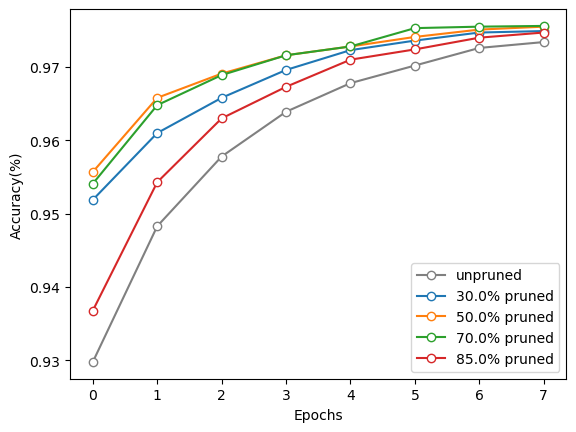

In [97]:
#training outcome comparisons

plt.plot(list(train_dict.keys())[:-2], list(train_dict.values())[:-2], label="unpruned", 
         marker='o', markerfacecolor='white', color='grey')

for i in range(len(pruning_weights)): 
    plt.plot(list(ticket_dict[0].keys())[:-2], list(ticket_dict[i].values())[:-2], 
             label=str(pruning_weights[i]*100)+'% pruned', 
             marker='o', linestyle='-', markerfacecolor='white')

plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()